## This notebook is used for identifying **carnitines in GNPS Library by SMILES**
(original notebook content: v_carnitines_M+H_substruct_df_for_manuscript.ipynb)

---
### Section 1: Read clean GNPS Library data
- already removed spectrum_ids associated with SUSPECT LIST data
- only includes spectrum_ids associated with M+H adduct

### Section 2: Identify all carnitines

## Input files needed for the Notebook
1. **Cleaned** GNPS Library metadata from clean_GNPS_Library_data.ipynb

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

In [2]:
# from v_rdkit_functions.py
import v_rdkit_functions
from v_rdkit_functions import mol_from_smiles_in_library
from v_rdkit_functions import substruct_search_from_smiles

### Section 1: Read clean GNPS Library data

In [3]:
# from shape_GNPS_Library_data.ipynb

input_library_cleaned = pd.read_csv('/home/jovyan/work/notebooks/outputs/CLEANED_GNPS_input_library.csv',sep=',', index_col='spectrum_id',low_memory=False)

In [4]:
len(input_library_cleaned)

245648

In [6]:
# identify molecules described in GNPS Library from SMILES in metadata
smiles_w_rdkit_obj_dict = mol_from_smiles_in_library(input_library_cleaned)

# ERRORS ARE EXPECTED!!!

[19:55:45] SMILES Parse Error: syntax error while parsing: 
[19:55:45] SMILES Parse Error: Failed parsing SMILES ' ' for input: ' '
[19:55:45] SMILES Parse Error: syntax error while parsing: N/A
[19:55:45] SMILES Parse Error: Failed parsing SMILES ' N/A' for input: ' N/A'
[19:55:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)
[19:55:45] SMILES Parse Error: Failed parsing SMILES ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)' for input: ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)'
[19:55:45] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 16
[19:55:45] Explicit valence for atom # 22 O, 3, is greater than permitted
[19:55:45] Explicit valence for atom # 31 O, 3, is greater than permitted
[19:55:45] Explicit valence for atom # 6 O, 3, is greater than 

In [7]:
len(smiles_w_rdkit_obj_dict)

29677

### Section 2: Substructure matching for carnitines

In [8]:
# carnitine substructure that captures all potentially modified variations
carnitine_derivatives = "OC(C[N+](C)(C)C)CC=O"

In [9]:
# Construct a molecule from a SMILES string using RDKit
carnitine_derivatives_mol = Chem.MolFromSmiles(carnitine_derivatives)

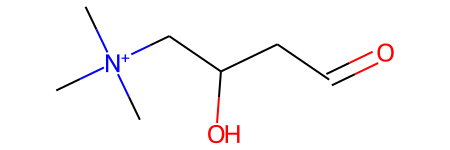

In [10]:
# View molecule
carnitine_derivatives_mol

In [11]:
# Subselection of GNPS Library dataframe for rows containing substructure of interest
library_df_w_carnitine_substruc = substruct_search_from_smiles(input_library_cleaned, smiles_w_rdkit_obj_dict, carnitine_derivatives)

In [12]:
library_df_w_carnitine_substruc

,index,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
spectrum_id,,,,,,,,,,,,,,,,,,,,,
CCMSLIB00004684226,4046,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,10bf09df91cd4bc49f11f9d042619262,1145,2,GNPS-LIBRARY,1,"[[78.831253,48.000000],[81.134575,89.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:17:01.0,fc87812c8b0f4d85811fcb06172d3d60,NaN,LZOSYCMHQXPBFU-UHFFFAOYSA-N,NaN,C17H33NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00004684227,4047,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,bf7f0b1faf244732b25797393a0c8bfe,1306,2,GNPS-LIBRARY,1,"[[81.067673,58.000000],[81.868629,39.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:16:43.0,84a4551c00454d7dadf16212716efcfa,NaN,XOMRRQXKHMYMOC-UHFFFAOYSA-O,NaN,C23H46NO4+,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00004684228,4048,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,a1c8ea94dcb2408aacf28b0a6b499e70,1604,2,GNPS-LIBRARY,1,"[[76.025177,28.000000],[76.907547,37.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:16:04.0,348e88fbeac0477dabad132e9bee2e67,NaN,XOMRRQXKHMYMOC-UHFFFAOYSA-N,NaN,C23H45NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00004684229,4049,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,1d3b324f1cf24c119a520d1633e83122,1548,2,GNPS-LIBRARY,1,"[[77.038208,52.000000],[79.039864,68.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:15:35.0,0c9c258babc44e4d9354d1ceee93b376,NaN,SEXHTZQULWPHBX-UHFFFAOYSA-N,NaN,C27H45NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
CCMSLIB00004684230,4050,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,d83a0ab3796a47db81fa17fcccb28f64,1538,2,GNPS-LIBRARY,1,"[[82.021034,18.000000],[82.307793,40.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:36:46.0,778bf693a1024b7e9d249443e967aeb5,NaN,MJLXQSQYKZWZCB-UHFFFAOYSA-N,NaN,C25H45NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCMSLIB00006121167,577880,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5049,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,62910528.000000],[85.028198,655002...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
CCMSLIB00006121169,577881,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5050,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[57.792702,2138579.000000],[60.077400,2803314...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
CCMSLIB00006121170,577882,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5051,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,50613920.000000],[73.382797,201758...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,NaN,RDHQFKQIGNGIED-MRVPVSSYSA-N,NaN,C9H17NO4,NaN,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."


In [14]:
# Construct molecules from SMILES string using RDKit
library_df_w_carnitine_substruc_mol = [Chem.MolFromSmiles(x) for x in library_df_w_carnitine_substruc.Smiles.unique()]

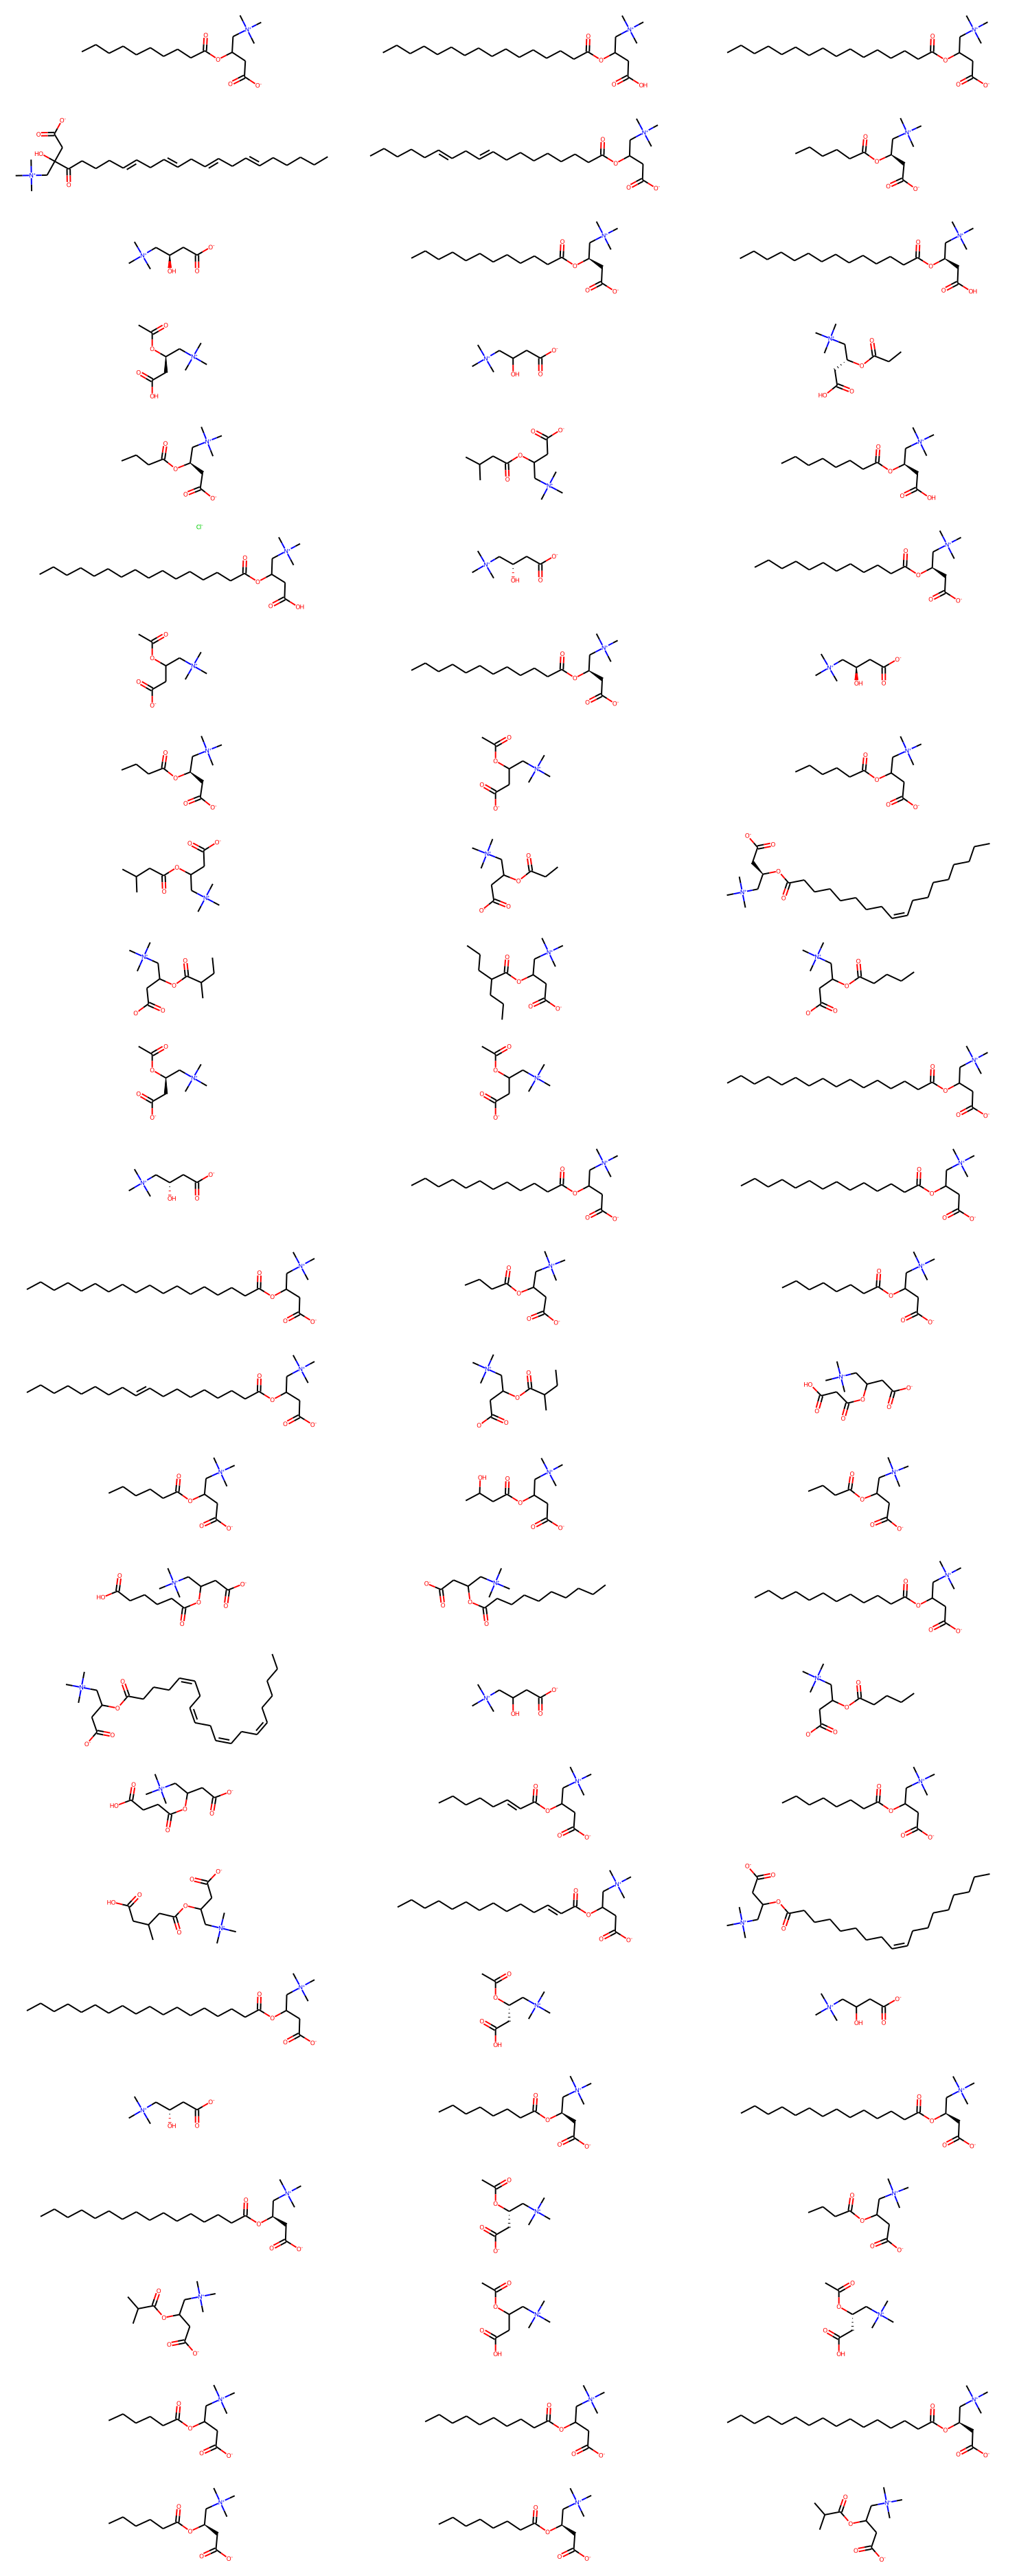

In [15]:
# View molecules to confirm dataframe only describes carnitines
Draw.MolsToGridImage(library_df_w_carnitine_substruc_mol,subImgSize=(500,150), useSVG = False, maxMols=200)

### Save file

In [26]:
library_df_w_carnitine_substruc.reset_index().to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_w_carnitine_substruc.csv', 
    sep=',', index=False)